In [1]:
def setpriority(pid=None,priority=1):
    """ Set The Priority of a Windows Process.  Priority is a value between 0-5 where
        2 is normal priority.  Default sets the priority of the current
        python process but can take any valid process ID. """
        
    import win32api,win32process,win32con
    
    priorityclasses = [win32process.IDLE_PRIORITY_CLASS,
                       win32process.BELOW_NORMAL_PRIORITY_CLASS,
                       win32process.NORMAL_PRIORITY_CLASS,
                       win32process.ABOVE_NORMAL_PRIORITY_CLASS,
                       win32process.HIGH_PRIORITY_CLASS,
                       win32process.REALTIME_PRIORITY_CLASS]
    if pid == None:
        pid = win32api.GetCurrentProcessId()
    handle = win32api.OpenProcess(win32con.PROCESS_ALL_ACCESS, True, pid)
    win32process.SetPriorityClass(handle, priorityclasses[priority])
setpriority()

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
odf=pd.read_csv(r'C:\Users\benja\sysreviewfall2019\Data\citation_counts.csv')

In [3]:
odf.columns

Index(['Unnamed: 0', 'authors', 'year', 'journal', 'DOI',
       'ecological_intensification', 'sustainable_intensification',
       'climate_smart', 'sustainable_agriculture', 'agroecology',
       'ecoagriculture', 'alternative_agriculture', 'permaculture', 'ipm',
       'biodynamics', 'regenerative agriculture', 'conservation agriculture',
       'organic agriculture', 'All Citations'],
      dtype='object')

In [4]:
odf.sort_values(by='All Citations',ascending=False)

,Unnamed: 0,authors,year,journal,DOI,ecological_intensification,sustainable_intensification,climate_smart,sustainable_agriculture,agroecology,ecoagriculture,alternative_agriculture,permaculture,ipm,biodynamics,regenerative agriculture,conservation agriculture,organic agriculture,All Citations
0,51833,Godfray HCJ,2010.0,HCJ,DOI 10.1126/science.1185383,59,215,15,66,47,1,0,1,18,0,0,60,53,390
1,85002,Abbott WS,1925.0,J ECON ENTOMOL,DOI 10.1093/jee/18.2.265a,0,0,0,0,1,0,0,0,373,0,0,0,12,384
2,144879,Giller KE,2009.0,FIELD CROP RES,DOI 10.1016/j.fcr.2009.06.017,20,58,18,27,14,0,0,0,3,0,0,351,6,372
3,102144,Tilman D,2011.0,P NATL ACAD SCI USA,DOI 10.1073/pnas.1116437108,50,245,5,50,31,0,1,2,10,1,1,41,24,349
4,112085,Tilman D,2002.0,NATURE,DOI 10.1038/nature01014,45,84,4,88,74,1,2,1,17,1,0,53,51,320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114237,157795,Gavilan P,2015.0,AGR WATER MANAGE,DOI 10.1016/j.agwat.2015.06.012,0,0,1,0,0,0,0,0,0,0,0,0,0,1
114236,157794,Christianson LE,2015.0,AGR WATER MANAGE,DOI 10.1016/j.agwat.2015.06.021,0,1,0,0,0,0,0,0,0,0,0,0,0,1
114235,157793,Han M,2015.0,AGR WATER MANAGE,DOI 10.1016/j.agwat.2015.06.028,0,0,0,0,0,0,0,0,0,0,0,1,0,1
114234,157790,Gozubuyuk Z,2015.0,AGR WATER MANAGE,DOI 10.1016/j.agwat.2015.07.003,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [5]:
topics=['ecological_intensification', 'sustainable_intensification',
       'climate_smart', 'sustainable_agriculture', 'agroecology',
       'ecoagriculture', 'alternative_agriculture', 'permaculture', 'ipm',
       'biodynamics', 'regenerative agriculture', 'conservation agriculture',
       'organic agriculture' ]

In [6]:
odf=odf[odf['All Citations']>=2]

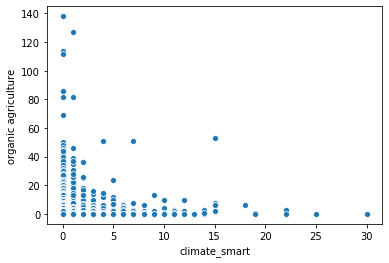

In [7]:
sns.scatterplot(x='climate_smart', y='organic agriculture', data=odf)

In [8]:
#method 1: Correlate based on all citations that are cited by column
LOL=[]
for t in topics:
    lis=[]
    for t1 in topics:
        tdf=odf[(odf[t]>=1)]
        x=pd.Series(tdf[t])
        y=pd.Series(tdf[t1])
        lis.append(x.corr(y, 'pearson'))
        #print (x)
        
    LOL.append(lis)


In [9]:
#method 2: include papers with value of 0
LOL1=[]
for t in topics:
    lis=[]
    for t1 in topics:
        x=pd.Series(odf[t])
        y=pd.Series(odf[t1])
        lis.append(x.corr(y, 'pearson'))
        #print (x)
        
    LOL1.append(lis)

In [10]:
corr1=pd.DataFrame(LOL, index=topics, columns=topics)
corr2=pd.DataFrame(LOL1, index=topics, columns=topics)

In [11]:
df=odf[topics]
import seaborn as sns



In [15]:
def list_flattener(nested_list):
    '''Flatten a nested list of any depth to a flat list'''
    while True:
        nested_list=[n for x in nested_list for n in x]
        if type(nested_list[0])!=list:
            return nested_list

In [18]:
max([i for i in list_flattener(LOL) if round(i, 5)!=1])

0.6339980857203077

In [21]:
import numpy as np

In [23]:
np.array(LOL).max()

1.0

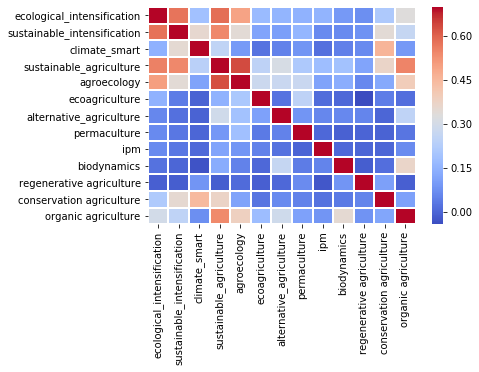

In [12]:
sns.heatmap(data=corr1, vmax=.7, cmap='coolwarm', linecolor='white',linewidths=1 )
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.savefig(r'C:\Users\benja\Documents\UVM\Dissertation_Docs\cross_citation.png', bbox_inches='tight')

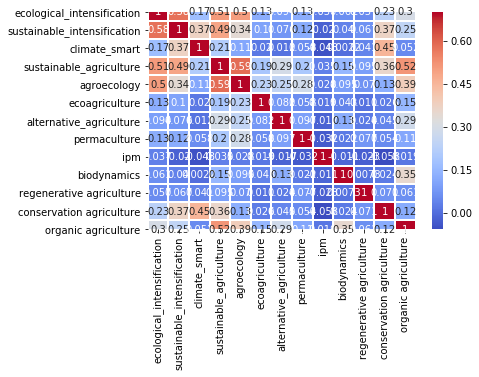

In [23]:
sns.heatmap(data=corr2, cmap='coolwarm',vmax=.7, annot=True, linecolor='white',linewidths=1 )

In [50]:
corr2

,ecological_intensification,sustainable_intensification,climate_smart,sustainable_agriculture,agroecology,biodynamic,conservation agriculture,integrated pest management,organic,permaculture
ecological_intensification,1.000000,0.615050,0.182417,0.327629,0.520798,0.070571,0.247355,0.145769,0.302035,0.107606
sustainable_intensification,0.615050,1.000000,0.350668,0.342929,0.466537,0.032875,0.353386,0.119814,0.207900,0.081675
climate_smart,0.182417,0.350668,1.000000,0.123468,0.286285,-0.008158,0.397286,0.070272,0.029065,0.047410
sustainable_agriculture,0.327629,0.342929,0.123468,1.000000,0.366114,0.105115,0.205828,0.123445,0.303526,0.120029
agroecology,0.520798,0.466537,0.286285,0.366114,1.000000,0.072000,0.325191,0.165537,0.321173,0.261187
biodynamic,0.070571,0.032875,-0.008158,0.105115,0.072000,1.000000,0.025289,0.016404,0.373800,0.013305
conservation agriculture,0.247355,0.353386,0.397286,0.205828,0.325191,0.025289,1.000000,0.126623,0.126196,0.048654
integrated pest management,0.145769,0.119814,0.070272,0.123445,0.165537,0.016404,0.126623,1.000000,0.145557,0.016375
organic,0.302035,0.207900,0.029065,0.303526,0.321173,0.373800,0.126196,0.145557,1.000000,0.075925
permaculture,0.107606,0.081675,0.047410,0.120029,0.261187,0.013305,0.048654,0.016375,0.075925,1.000000
